<a href="https://colab.research.google.com/github/MagicMoleMM/DistFitter/blob/main/08_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(50, 2)


(-3.5, 7.5, -3.938853130834508, 12.036033868111778)

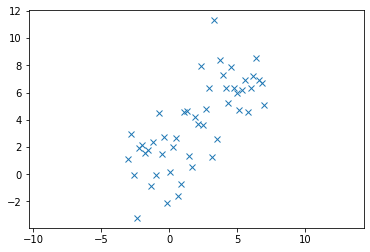

In [11]:
import numpy as np
import  pickle
from matplotlib import pyplot as plt
%matplotlib inline 

with open('/content/drive/MyDrive/Colab Notebooks/Файлы для обучения/eigen.pkl','rb') as f:
  X = pickle.load(f)

print(X.shape)
plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[5.28331909],
       [3.84284422],
       [5.88859559],
       [8.07409089],
       [4.16799935],
       [3.8592636 ],
       [4.17040423],
       [3.86884344],
       [5.65483844],
       [3.16278418]])

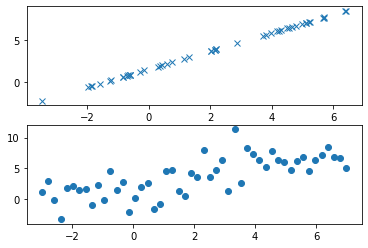

In [9]:
X_new = pca.inverse_transform(X_pca)

plt.figure()
plt.subplot(211)
plt.plot(X_new[:,0],X_new[:,1], 'x')
plt.subplot(212)
plt.plot(X[:,0],X[:,1], 'o')

In [17]:
mean_val = X.mean(axis=0)
N = X.shape[0]
X_centered = X.copy() - mean_val
X_centered [:10]

array([[-5.        , -2.57641926],
       [-4.79591837, -0.80537034],
       [-4.59183673, -3.77593421],
       [-4.3877551 , -6.93656366],
       [-4.18367347, -1.81203199],
       [-3.97959184, -1.58026031],
       [-3.7755102 , -2.19158187],
       [-3.57142857, -1.96956883],
       [-3.36734694, -4.58683833],
       [-3.16326531, -1.38553735]])

In [20]:
X_cov = X_centered.T.dot(
    X_centered
) / (N-1)

print(f'Ковариционная матрица: \n {X_cov}')

Ковариционная матрица: 
 [[8.85047897 6.81117445]
 [6.81117445 9.95969352]]


In [21]:
np.cov(X_centered, rowvar=0)


array([[8.85047897, 6.81117445],
       [6.81117445, 9.95969352]])

In [63]:
from numpy import linalg

eigenvalues, eigenvectors = linalg.eig(X_cov)
eigenvectors.T

array([[-0.7352406 ,  0.67780621],
       [-0.67780621, -0.7352406 ]])

2.1316282072803005e-16


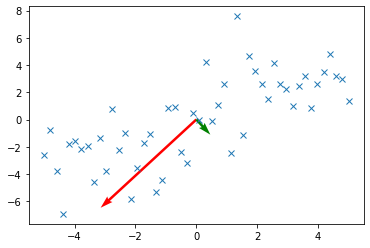

In [81]:
origin = np.array(X_centered.mean(axis=0)) #начало координат
print(origin[0])

plt.quiver(*origin, *eigenvectors.T[:,0], color=['r'], scale=eigenvalues[0])
plt.quiver(*origin, *eigenvectors.T[:,1], color=['g'], scale=eigenvalues[1])
plt.plot(X_centered[:,0],X_centered[:,1], 'x')